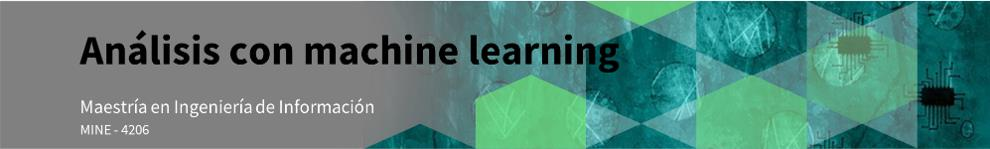

- **Integrante 1:** Santiago Martínez Novoa - 202112020
- **Integrante 2:** Jeremias Emanuel Kramer - 202325746

---
# Contexto y objetivos.

Para la gestión de riesgos ambientales, la organización espera la construcción de un modelo predictivo que permita determinar la demanda sobre el uso de un sistema de alquiler de bicicletas. Este conocimiento puede dar soporte para mejorar el servicio y conocer los factores que inciden en su eficiencia. Fomentar planes de movilidad sostenible es una manera de reducir las emisiones de CO2, que afectan la temperatura del planeta y desequilibran el ciclo natural.

**Objetivos**:
* Aplicar técnicas de regresión para construir un modelo predictivo que permita estimar la demanda sobre el uso de un sistema de alquiler de bicicletas siguiendo el ciclo de machine learning.
* Determinar cuáles son los factores que más inciden en la demanda con base en los datos.

**Datos**: Información original obtenida de [rental-bike-sharing](https://www.kaggle.com/datasets/imakash3011/rental-bike-sharing), ten en cuenta que los datos cuentan con algunas modificaciones.

# Entendimiento del negocio.

El conjunto de datos recoge información sobre la cantidad de bicicletas rentadas en un período de tiempo, junto con información meteorológica y de temporalidad, entre otros. Es importante que revises el diccionario como primer paso para comprender estos datos.


Con apoyo de la organización ha sido posible elaborar el siguiente diccionario de datos:

| ATRIBUTO | DEFINICIÓN |
| :- | :- |
| **season** | Estación del año (Winter, Spring, Summer, Fall). |
| **weekday** | Día de la semana (de 1 a 7). |
| **weathersit** | Clima (*Clear*, *Mist*, *Light Rain*, *Heavy Rain*). |
| **temp** | Temperatura. |
| **atemp** | Sensación de temperatura. |
| **hum** | Humedad. |
| **windspeed** | Velocidad del viento. |
| **cnt** | Cantidad de bicicletas rentadas. |
| **time_of_day** | Parte del día (*Morning*, *Evening*, *Night*). |

# Actividades a realizar.

1. Explorar y perfilar los datos, utilizando las funcionalidades de la librería pandas. Recuerda que este paso es muy importante para determinar problemas de calidad (por ejemplo, valores ausentes y registros duplicados) y tomar decisiones relacionadas con la preparación de los datos para el algoritmo de aprendizaje.
2. Limpiar y preparar los datos, justificando las decisiones tomadas con base en los resultados obtenidos en el paso anterior.
3. Construir un modelo de regresión polinomial. Para determinar el grado de la transformación polinomial, emplea las técnicas de selección de modelos sobre los siguientes valores de grado de polinomio: [2, 3, 4]. Utiliza para la selección la métrica RMSE.
4. Construir un modelo de regresión regularizada Lasso. Para determinar el valor del hiperparámetro de regularización utiliza las técnicas de selección de modelos sobre los siguientes valores para α: [0.01, 0.1, 1, 2, 3, 4, 5]. Utiliza para la selección la métrica RMSE.
5. Elaborar una tabla comparativa mostrando el rendimiento sobre test de los dos modelos seleccionados (con mejores rendimientos) de las actividades 3 y 4, con las métricas R2, RMSE y MAE. ¿Cuál modelo ofrece el mejor rendimiento sobre el conjunto test? ¿Qué interpretación puedes darles a los valores obtenidos sobre las métricas de rendimiento?
6. Determinar el mejor modelo Lasso con las variables más importantes para la predicción. A partir de estas, ¿qué interpretación de cara al problema puedes dar?. Reflexiona sobre cómo este nuevo conocimiento podría ayudar a tomar decisiones en el contexto del problema.

# 0. Cargas iniciales

## 0.1. Importación de librerías

In [1]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector

#Persistencia de modelos
from joblib import dump, load

#Librerías extras
import itertools

print(f"La versión de sklearn es: {sklearn.__version__}")

La versión de sklearn es: 1.4.1.post1


## 0.2. Carga de datos

In [2]:
url = 'https://raw.githubusercontent.com/santiagom99/Machine-Learning-Labs/main/Talleres/Taller%201/renta-bic.csv'

data = pd.read_csv(url)

In [3]:
data.head(20)

season  weekday  weathersit   temp    atemp   hum  windspeed  cnt  \
0   Winter        6       Clear   3.28   3.0014  0.81     0.0000   16   
1   Winter        6       Clear   2.34   1.9982  0.80     0.0000   40   
2   Winter        6       Clear   2.34   1.9982  0.80     0.0000   32   
3   Winter        6       Clear   3.28   3.0014  0.75     0.0000   13   
4   Winter        6       Clear   3.28   3.0014  0.75     0.0000    1   
5   Winter        6        Mist   3.28   1.0016  0.75     6.0032    1   
6   Winter        6       Clear   2.34   1.9982  0.80     0.0000    2   
7   Winter        6       Clear   1.40   1.0016  0.86     0.0000    3   
8   Winter        6       Clear   3.28   3.0014  0.75     0.0000    8   
9   Winter        6       Clear   7.04   7.0010  0.76     0.0000   14   
10  Winter        6       Clear   9.86   9.9974  0.76    16.9979   36   
11  Winter        6       Clear   8.92   5.9978  0.81    19.0012   56   
12  Winter        6       Clear  11.74  11.9972  0.77    19.0012   84   
13  Winter        6        Mist  13.62  13.9970  0.72    19.9995   94   
14  Winter        6        Mist  13.62  13.9970  0.72    19.0012  106   
15  Winter        6        Mist  12.68  13.0004  0.77    19.9995  110   
16  Winter        6        Mist  11.74  11.9972  0.82    19.9995   93   
17  Winter        6        Mist  12.68  13.0004  0.82    19.0012   67   
18  Winter        6  Light Rain  11.74  11.9972  0.88    16.9979   35   
19  Winter        6  Light Rain  11.74  11.9972  0.88    16.9979   37   

   time_of_day  
0        Night  
1        Night  
2        Night  
3        Night  
4        Night  
5      Morning  
6      Morning  
7      Morning  
8      Morning  
9      Morning  
10     Morning  
11     Morning  
12     Morning  
13     Evening  
14     Evening  
15     Evening  
16     Evening  
17     Evening  
18     Evening  
19     Evening

Se realiza la separación de los datos entre datos de entrenamiento y de test

In [4]:
train, test = train_test_split(data, test_size=0.2, random_state=19)
train.head()

season  weekday  weathersit   temp    atemp   hum  windspeed  cnt  \
6469     Fall        0  Light Rain   7.98   5.0012  0.87    19.0012    9   
2413   Spring        5       Clear  16.44  17.0000  0.55    12.9980  136   
14293  Summer        4       Clear  26.78  28.0022  0.48    15.0013  941   
10824  Spring        0        Mist   7.98   5.9978  0.81     8.9981   25   
9027   Winter        2        Mist   4.22  -0.9982  0.70    22.0028   12   

      time_of_day  
6469        Night  
2413      Morning  
14293     Evening  
10824       Night  
9027        Night

# 1. Preprocesamiento de los datos

## 1.1. Exploración de los datos

En primer lugar se debe realizar el perfilamiento de los datos

In [5]:
ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Gracias al perfilamiento se determinó que es necesario realizar la estandarización de los días de la semana. 

In [6]:
# Estandarizacion tipo de transmisión
train['weekday'] = train['weekday'].replace([0,1,2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

La única característica que falta por estandarizar es weekday, se realizará la transformación

También es posible encontrar el número de registros duplicados en el set de datos, los cuales también serán eliminados durante la transformación de los datos:

In [7]:
print("Total de clientes duplicados iniciales: ",train.duplicated(keep = False).sum())

Total de clientes duplicados iniciales:  52


## 1.2. Información general de los datos

Nombres de las columnas en la información:

In [8]:
train.columns

Index(['season', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'time_of_day'],
      dtype='object')

Esta es la información de las características numéricas, a continuación se puede notar que no hay valores que estén fuera de lugar o por fuera de los rangos lógicos para cada una de ellas.

In [9]:
train.describe()

temp         atemp           hum     windspeed           cnt
count  13903.000000  13903.000000  13903.000000  13903.000000  13903.000000
mean      15.392498     15.441961      0.628142     12.691949    189.387614
std        9.057548     11.354106      0.192525      8.174405    181.799852
min       -7.060000    -16.000000      0.000000      0.000000      1.000000
25%        7.980000      5.997800      0.480000      7.001500     40.000000
50%       15.500000     15.996800      0.630000     11.001400    141.000000
75%       23.020000     24.999200      0.780000     16.997900    281.000000
max       39.000000     50.000000      1.000000     56.996900    977.000000

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13903 entries, 6469 to 10862
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       13903 non-null  object 
 1   weekday      13903 non-null  object 
 2   weathersit   13903 non-null  object 
 3   temp         13903 non-null  float64
 4   atemp        13903 non-null  float64
 5   hum          13903 non-null  float64
 6   windspeed    13903 non-null  float64
 7   cnt          13903 non-null  int64  
 8   time_of_day  13903 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [11]:
print(f"El número de atributos es: {train.shape[1]} y el número de instancias es: {train.shape[0]}")

El número de atributos es: 9 y el número de instancias es: 13903


De los 9 atributos, observamos 5 son numéricos y los 4 restantes categóricos.

In [12]:
round(100*(train.isnull().sum()/len(train)), 2).sort_values(ascending=False)

season         0.0
weekday        0.0
weathersit     0.0
temp           0.0
atemp          0.0
hum            0.0
windspeed      0.0
cnt            0.0
time_of_day    0.0
dtype: float64

Como se puede observar no es necesario eliminar valores nulos pues no hay registros con ellos. Tampoco hay valores negativos que no sean adecuados para las características.

## 1.3. Análisis exploratorio de los datos

### 1.3.1. Comportamiento variables categóricas

Luego de haber realizado la exloración de los datos se tomaron las siguientes decisiones. Como el objetivo es encontrar cuales son las condiciones que hacen más propensa la renta de bicicleta se comparará esta bvariable contra todas las demás.

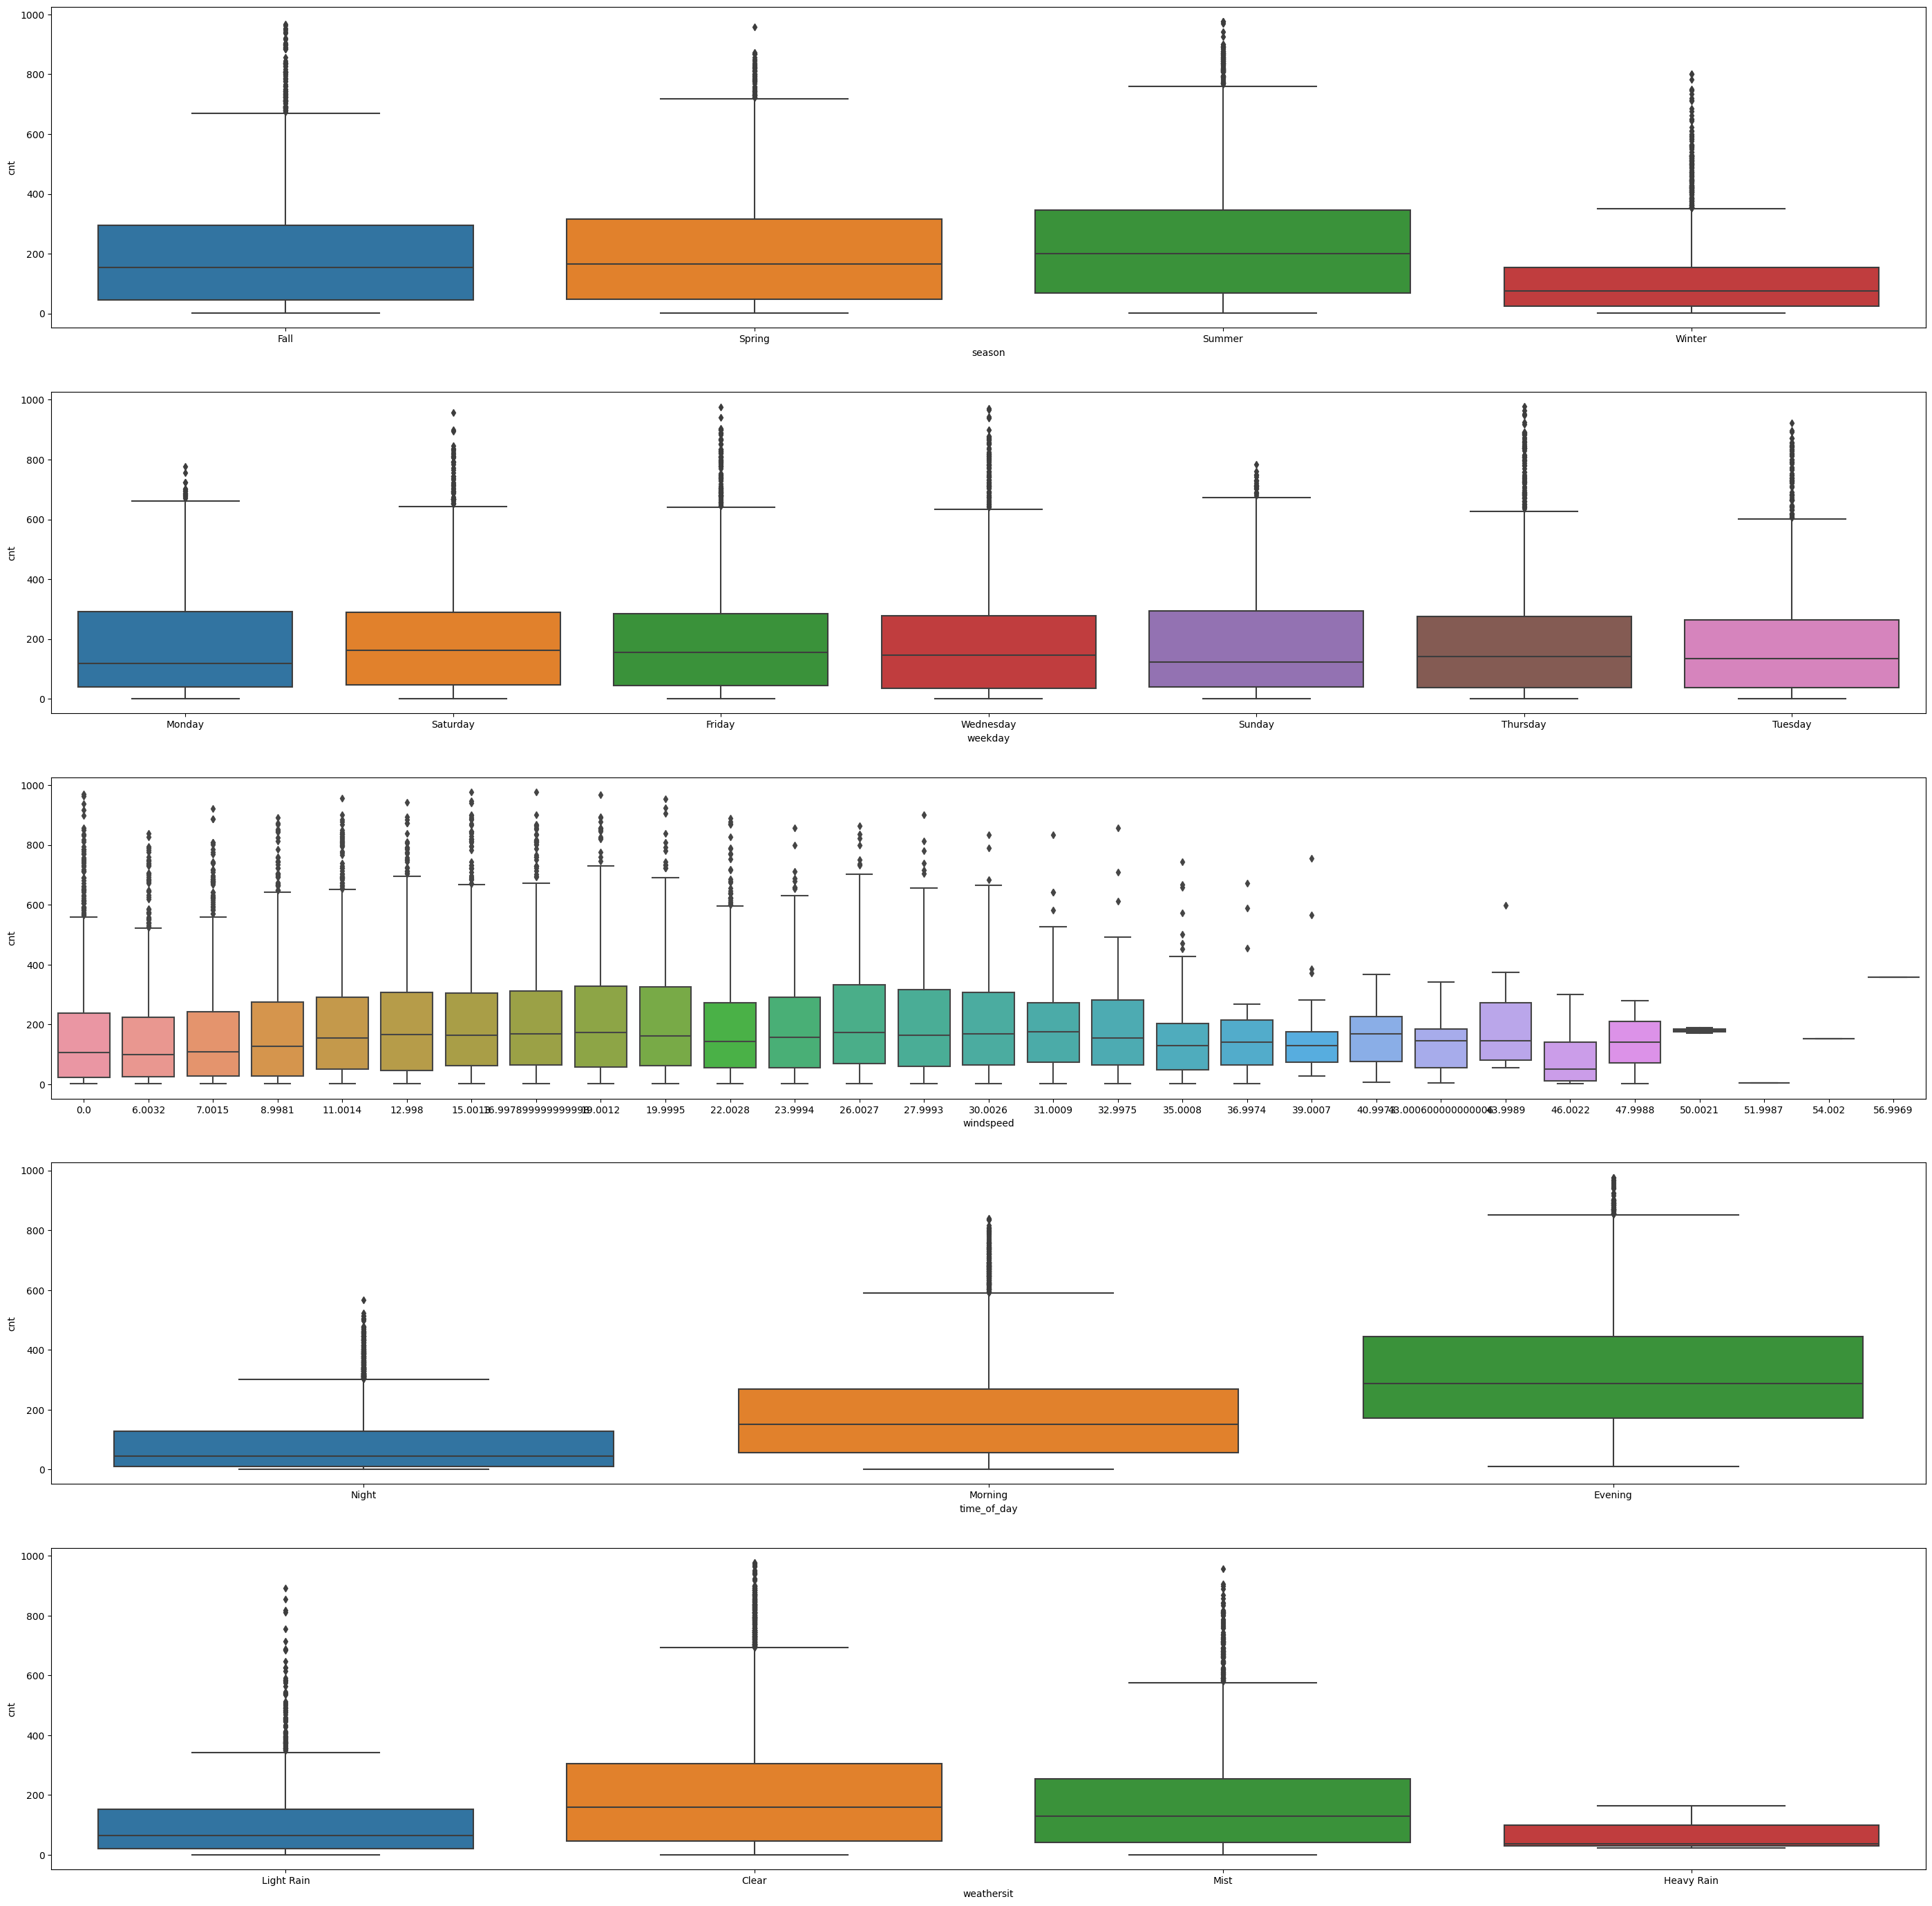

In [13]:
plt.figure(figsize=(35, 35))
plt.subplot(5, 1, 1)
sns.boxplot(x='season', y='cnt', data=train)
plt.subplot(5, 1, 2)
sns.boxplot(x='weekday', y='cnt', data=train)
plt.subplot(5, 1, 3)
sns.boxplot(x='windspeed', y='cnt', data=train)
plt.subplot(5, 1, 4)
sns.boxplot(x='time_of_day', y='cnt', data=train)
plt.subplot(5, 1, 5)
sns.boxplot(x='weathersit', y='cnt', data=train)
plt.show()

De estas gráficas se puede concluir que no hay un nivel de cardinalidad lo suficientemente alto como para descartar algunas de las características, tampoco hay valores atípicos dentro de los registros.

Sin embargo, del perfilamiento de los datos se encontró que existe un desbalance en la columna de weathersit que se revisará en mayor detalle:

In [14]:
train['weathersit'].value_counts()

Clear         9094
Mist          3660
Light Rain    1146
Heavy Rain       3
Name: weathersit, dtype: int64

Dado que la columna está compuesta mayoritariamente por dos valores ("Clear" y "Mist"), con "Light Rain" como una categoría menos frecuente y "Heavy Rain" con solo tres registros, se puede argumentar que la categoría "Heavy Rain" es extremadamente rara en comparación con las otras. Por lo que lo mejor será eliminar la columna weathersit 

La decisión de eliminar la columna de weathersit del conjunto de datos se justifica por la necesidad de prevenir posibles sesgos y malinterpretaciones en el análisis y la predicción de datos meteorológicos. La presencia de la categoría extremadamente rara "Heavy Rain" en el conjunto de datos de entrenamiento podría distorsionar la capacidad del modelo para generalizar y hacer predicciones precisas sobre condiciones climáticas futuras. Esto se vuelve especialmente relevante al considerar conjuntos de datos de prueba donde la presencia de "Heavy Rain" podría ser aún más infrecuente. 

No es posible solo eliminar los registros debido a que existe la posibilidad de que al removerlos solo del set de entrenamiento se corre el riesgo de sesgar los resultados de la predicción del modelo en caso de que estos datos si sean representativos en el set de test. 

Al eliminar la columna, se asegura que el modelo se ajuste de manera más equilibrada. Esta acción ayuda a mantener la calidad de los modelos de predicción y a mitigar el riesgo de tomar decisiones erróneas basadas en datos sesgados o poco representativos.

### 1.3.2. Comportamiento variables numéricas

Ahora se procederá a revisar la correlación de los datos, pues de encontrarse columnas cuya correlación es bastante alta tal vez sea necesario eliminar una de ellas.

C:\Users\user\AppData\Local\Temp\ipykernel_23776\1795384894.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot = True, cmap="coolwarm")


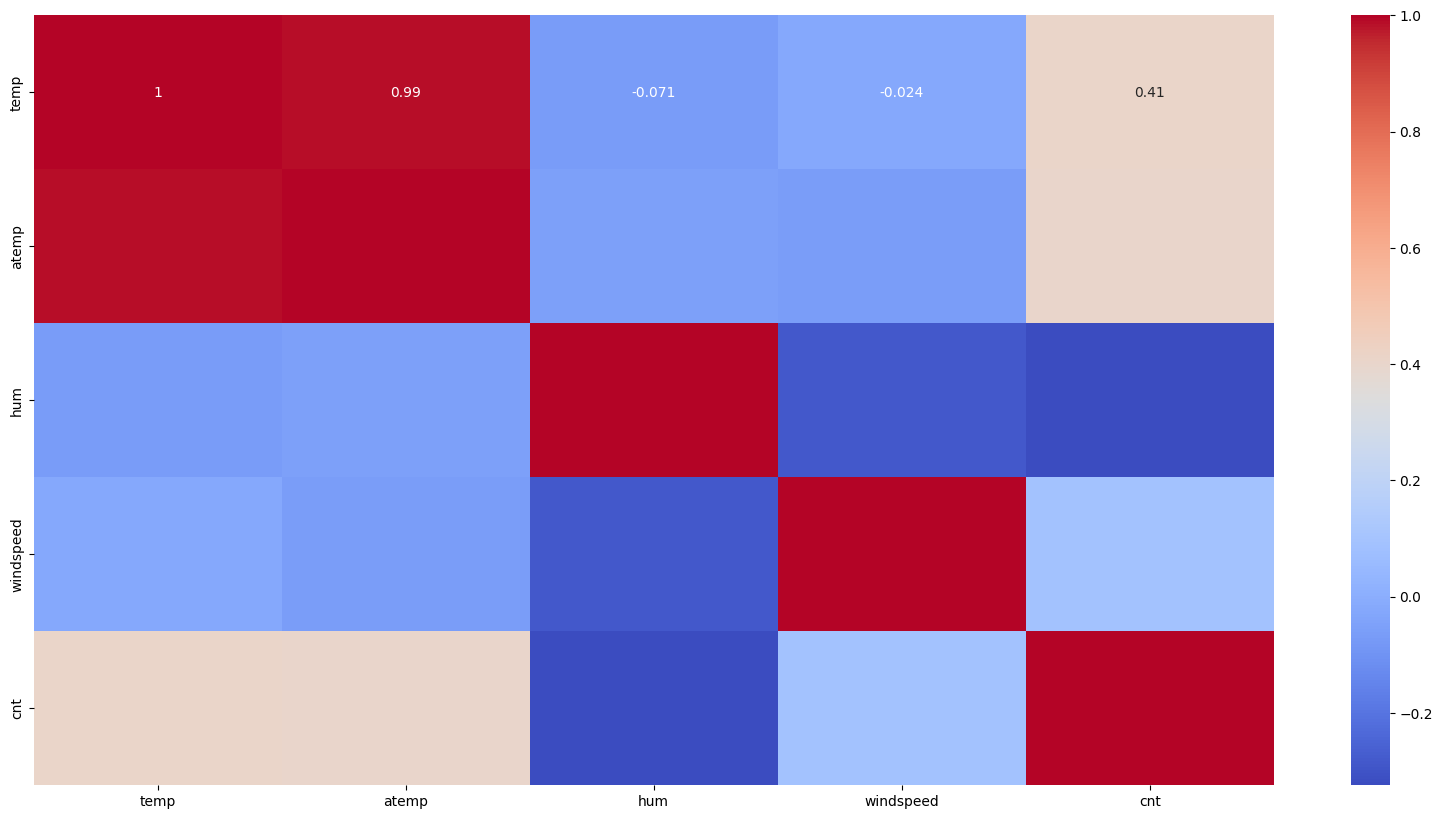

In [15]:
plt.figure(figsize = (20,10))
sns.heatmap(train.corr(), annot = True, cmap="coolwarm")
plt.show()

Gracias a la gráfica es posible identificar que es necesario quedarse únicamente con una de las características entre temp y atemp


La decisión de conservar únicamente una de las características entre "temp" y "atemp" se fundamenta en varios atributos de calidad de los datos. En primer lugar, desde la perspectiva de la precisión, mantener ambas características puede redundar en información similar y aumentar la complejidad del conjunto de datos sin mejorar la precisión de los análisis. Además, en términos de coherencia, conservar solo una de las características garantiza una representación uniforme de la temperatura en el conjunto de datos, evitando posibles discrepancias en la interpretación. 

Esta acción también promueve la eficiencia computacional al reducir la dimensionalidad del conjunto de datos, lo que resulta en un procesamiento más rápido y una utilización más eficiente de los recursos.

# 2. Transformación de los datos

## 2.1. Limpieza de duplicados y separación de datos

Ahora se eliminarán las columnas repetidas que se sabe que existe gracias al perfilamiento de los datos y que pueden distorsionar los resultados del análisis al proporcionar una representación inflada de ciertos datos, esto va en contra del principio de unicidad de los datos.

In [16]:
print("Número inicial de clientes: ", len(train))
train = train.drop_duplicates(keep='first')
print("Número final de clientes: ", len(train))

Número inicial de clientes:  13903
Número final de clientes:  13877


De acuerdo con el negocio nuestro objetivo es predecir el número de bicicletas rentadas, así que se separará de los demás datos la columna cnt para tener organizados de manera correcta los atributos:

In [17]:
new_train = train.copy()
X_train, Y_train = new_train.drop(['cnt'], axis=1), new_train['cnt']
display(X_train)
Y_train

season    weekday  weathersit   temp    atemp   hum  windspeed  \
6469     Fall     Monday  Light Rain   7.98   5.0012  0.87    19.0012   
2413   Spring   Saturday       Clear  16.44  17.0000  0.55    12.9980   
14293  Summer     Friday       Clear  26.78  28.0022  0.48    15.0013   
10824  Spring     Monday        Mist   7.98   5.9978  0.81     8.9981   
9027   Winter  Wednesday        Mist   4.22  -0.9982  0.70    22.0028   
...       ...        ...         ...    ...      ...   ...        ...   
6452     Fall     Sunday  Light Rain  10.80  11.0006  0.76    23.9994   
1043   Winter   Thursday       Clear   1.40  -2.9980  0.47    12.9980   
1378   Winter   Thursday       Clear  15.50  15.9968  0.23    19.0012   
17141  Winter     Sunday       Clear   4.22  -2.0014  0.44    39.0007   
10862  Spring    Tuesday       Clear  15.50  15.9968  0.27    16.9979   

      time_of_day  
6469        Night  
2413      Morning  
14293     Evening  
10824       Night  
9027        Night  
...           ...  
6452      Morning  
1043      Morning  
1378      Evening  
17141       Night  
10862     Evening  

[13877 rows x 8 columns]

6469       9
2413     136
14293    941
10824     25
9027      12
        ... 
6452     121
1043       5
1378     268
17141     31
10862    618
Name: cnt, Length: 13877, dtype: int64

## 2.2. Eliminación de columnas y registros con rareza elevada

Como se mencionó durante el análisis de los datos es importante elegir una columna entre temp y atemp debido a su alta correlación pueden afectar los resultados del modelo, por el momento se decidirá dejar solo atemp. 

In [18]:
drop_columns = ['temp','weathersit']
X_train = X_train.drop(drop_columns, axis=1)

In [19]:
X_train.head()

season    weekday    atemp   hum  windspeed time_of_day
6469     Fall     Monday   5.0012  0.87    19.0012       Night
2413   Spring   Saturday  17.0000  0.55    12.9980     Morning
14293  Summer     Friday  28.0022  0.48    15.0013     Evening
10824  Spring     Monday   5.9978  0.81     8.9981       Night
9027   Winter  Wednesday  -0.9982  0.70    22.0028       Night


La eliminación de los valores únicos que aparecen solo tres veces, aunque técnicamente válidos, sigue siendo justificada para mantener la integridad y la coherencia del conjunto de datos. Aunque estos valores son válidos, su rareza en comparación con el resto de los datos podría introducir sesgos o distorsiones en los análisis posteriores. Por lo tanto, su eliminación ayuda a garantizar que el conjunto de datos refleje de manera más precisa la distribución general de la variable categórica y mejore la calidad de los análisis resultantes. Esto se alinea con el atributo de calidad de datos de "Integridad", ya que se busca mantener la integridad del conjunto de datos al eliminar valores que podrían ser considerados como excepciones poco representativas.

## 2.3. Transformación de variables categóricas

Para que el algoritmo entienda la información de las variables categóricas se les va a realizar una transformación utilizando OneHotEncoder.

In [20]:
cat_features = ['season', 'weekday', 'time_of_day']
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train[cat_features])

enc.get_feature_names_out()

array(['season_Fall', 'season_Spring', 'season_Summer', 'season_Winter',
       'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'time_of_day_Evening', 'time_of_day_Morning',
       'time_of_day_Night'], dtype=object)

In [21]:
num_features = list(set(X_train.columns) - set(cat_features))

X_trans = pd.DataFrame(enc.transform(X_train[cat_features]).toarray(), columns=enc.get_feature_names_out(), index=X_train.index)
X_trans = pd.concat([X_trans, X_train[num_features]], axis=1)

X_trans

season_Fall  season_Spring  season_Summer  season_Winter  \
6469           1.0            0.0            0.0            0.0   
2413           0.0            1.0            0.0            0.0   
14293          0.0            0.0            1.0            0.0   
10824          0.0            1.0            0.0            0.0   
9027           0.0            0.0            0.0            1.0   
...            ...            ...            ...            ...   
6452           1.0            0.0            0.0            0.0   
1043           0.0            0.0            0.0            1.0   
1378           0.0            0.0            0.0            1.0   
17141          0.0            0.0            0.0            1.0   
10862          0.0            1.0            0.0            0.0   

       weekday_Friday  weekday_Monday  weekday_Saturday  weekday_Sunday  \
6469              0.0             1.0               0.0             0.0   
2413              0.0             0.0               1.0             0.0   
14293             1.0             0.0               0.0             0.0   
10824             0.0             1.0               0.0             0.0   
9027              0.0             0.0               0.0             0.0   
...               ...             ...               ...             ...   
6452              0.0             0.0               0.0             1.0   
1043              0.0             0.0               0.0             0.0   
1378              0.0             0.0               0.0             0.0   
17141             0.0             0.0               0.0             1.0   
10862             0.0             0.0               0.0             0.0   

       weekday_Thursday  weekday_Tuesday  weekday_Wednesday  \
6469                0.0              0.0                0.0   
2413                0.0              0.0                0.0   
14293               0.0              0.0                0.0   
10824               0.0              0.0                0.0   
9027                0.0              0.0                1.0   
...                 ...              ...                ...   
6452                0.0              0.0                0.0   
1043                1.0              0.0                0.0   
1378                1.0              0.0                0.0   
17141               0.0              0.0                0.0   
10862               0.0              1.0                0.0   

       time_of_day_Evening  time_of_day_Morning  time_of_day_Night    atemp  \
6469                   0.0                  0.0                1.0   5.0012   
2413                   0.0                  1.0                0.0  17.0000   
14293                  1.0                  0.0                0.0  28.0022   
10824                  0.0                  0.0                1.0   5.9978   
9027                   0.0                  0.0                1.0  -0.9982   
...                    ...                  ...                ...      ...   
6452                   0.0                  1.0                0.0  11.0006   
1043                   0.0                  1.0                0.0  -2.9980   
1378                   1.0                  0.0                0.0  15.9968   
17141                  0.0                  0.0                1.0  -2.0014   
10862                  1.0                  0.0                0.0  15.9968   

        hum  windspeed  
6469   0.87    19.0012  
2413   0.55    12.9980  
14293  0.48    15.0013  
10824  0.81     8.9981  
9027   0.70    22.0028  
...     ...        ...  
6452   0.76    23.9994  
1043   0.47    12.9980  
1378   0.23    19.0012  
17141  0.44    39.0007  
10862  0.27    16.9979  

[13877 rows x 17 columns]

Se actualizará la variable X_train para dejar los datos listos para el entrenamiento:

In [22]:
X_train = X_trans

In [23]:
del X_trans

## 2.4. Transformación datos de prueba

Se eliminan los elementos duplicados

In [24]:
new_test = test.copy()
new_test = new_test.drop(drop_columns, axis=1)
new_test = new_test.drop_duplicates()
new_test

season  weekday    atemp   hum  windspeed  cnt time_of_day
6917     Fall        4  13.9970  0.51    22.0028  241       Night
11517  Spring        1  11.9972  0.71     8.9981    8       Night
13489  Summer        6  20.0030  0.88    16.9979   15     Morning
7835     Fall        1  13.0004  0.88    15.0013    5       Night
5298   Summer        6  28.0022  0.74    19.0012  281     Evening
...       ...      ...      ...   ...        ...  ...         ...
16378    Fall        2   5.9978  0.66    12.9980    6       Night
1657   Winter        1   9.9974  0.37    11.0014  101     Evening
12098  Spring        4  20.9996  0.83     7.0015  415     Morning
15177    Fall        6  24.9992  0.40    16.9979  750     Evening
9820   Winter        0   3.0014  0.36    15.0013   15       Night

[3475 rows x 7 columns]

Se realiza la separación de los datos entre las variables dependientes y la independiente.

In [25]:
X_test, Y_test = new_test.drop(['cnt'],axis=1), new_test['cnt']
display(X_test)
Y_test

season  weekday    atemp   hum  windspeed time_of_day
6917     Fall        4  13.9970  0.51    22.0028       Night
11517  Spring        1  11.9972  0.71     8.9981       Night
13489  Summer        6  20.0030  0.88    16.9979     Morning
7835     Fall        1  13.0004  0.88    15.0013       Night
5298   Summer        6  28.0022  0.74    19.0012     Evening
...       ...      ...      ...   ...        ...         ...
16378    Fall        2   5.9978  0.66    12.9980       Night
1657   Winter        1   9.9974  0.37    11.0014     Evening
12098  Spring        4  20.9996  0.83     7.0015     Morning
15177    Fall        6  24.9992  0.40    16.9979     Evening
9820   Winter        0   3.0014  0.36    15.0013       Night

[3475 rows x 6 columns]

6917     241
11517      8
13489     15
7835       5
5298     281
        ... 
16378      6
1657     101
12098    415
15177    750
9820      15
Name: cnt, Length: 3475, dtype: int64

Se realiza la transformación de la columna Weekday

In [26]:
X_test['weekday'] = X_test['weekday'].replace([0,1,2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

Finalmente se realiza el OneHotEncoder para las variables categóricas

In [27]:
cat_features = ['season', 'weekday', 'time_of_day']

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_test[cat_features])

enc.get_feature_names_out()
num_features = list(set(X_test.columns) - set(cat_features))

X_trans2 = pd.DataFrame(enc.transform(X_test[cat_features]).toarray(), columns=enc.get_feature_names_out(), index=X_test.index)
X_trans2 = pd.concat([X_trans2, X_test[num_features]], axis=1)

X_trans2
X_test = X_trans2
del X_trans2

A continuacuón se puede observar el resultado de las transformaciones a las variables categóricas y la creación y adición de las nuevas variables 

In [28]:
X_test.head()

season_Fall  season_Spring  season_Summer  season_Winter  \
6917           1.0            0.0            0.0            0.0   
11517          0.0            1.0            0.0            0.0   
13489          0.0            0.0            1.0            0.0   
7835           1.0            0.0            0.0            0.0   
5298           0.0            0.0            1.0            0.0   

       weekday_Friday  weekday_Monday  weekday_Saturday  weekday_Sunday  \
6917              1.0             0.0               0.0             0.0   
11517             0.0             0.0               0.0             0.0   
13489             0.0             0.0               0.0             1.0   
7835              0.0             0.0               0.0             0.0   
5298              0.0             0.0               0.0             1.0   

       weekday_Thursday  weekday_Tuesday  weekday_Wednesday  \
6917                0.0              0.0                0.0   
11517               0.0              1.0                0.0   
13489               0.0              0.0                0.0   
7835                0.0              1.0                0.0   
5298                0.0              0.0                0.0   

       time_of_day_Evening  time_of_day_Morning  time_of_day_Night    atemp  \
6917                   0.0                  0.0                1.0  13.9970   
11517                  0.0                  0.0                1.0  11.9972   
13489                  0.0                  1.0                0.0  20.0030   
7835                   0.0                  0.0                1.0  13.0004   
5298                   1.0                  0.0                0.0  28.0022   

        hum  windspeed  
6917   0.51    22.0028  
11517  0.71     8.9981  
13489  0.88    16.9979  
7835   0.88    15.0013  
5298   0.74    19.0012

# 3. Modelamiento


En este análisis, se emplearán dos algoritmos de modelado de datos: regresión polinomial y regresión polinomial con Lasso. El propósito es determinar cuál de estos métodos es más efectivo y obtener los coeficientes correspondientes a cada columna para una evaluación detallada del modelo.

## 3.1. Regresión Polinómica

La __Regresión Polinomial__ extiende el modelo lineal al agregar predictores adicionales, que se obtienen al elevar cada uno de los predictores originales a una potencia. Por ejemplo, una regresión cúbica utiliza tres variables independientes, como predictores. Este enfoque proporciona una forma sencilla de proporcionar un ajuste no lineal a los datos, y que en datos más complejos pueden ajustarse mejor al comportamiento de estos. [2]

### 3.1.1. Creación del Pipeline y de función complementaria

El Pipeline se crea con el objetivo de poder realizar la regresión polinómica a ambos conjuntos de datos de manera fácil y sin tener que caer en la repetición de código. 

Sin embargo, antes de construirlo se va a realizar una estandarización con el objetivo de evitar que el modelo esté sesgado para valores que estén en cierto intervalo. Esp por esto que para los datos del negocio se decidió realizar una última transformación de estandarización.

La elección de utilizar StandardScaler en lugar de MinMaxScaler para datos con columnas numéricas puede justificarse por facilidad de interpretación de los coeficientes en modelos lineales. Al utilizar modelos basados en coeficientes, como la regresión lineal, StandardScaler ofrece una interpretación más directa de los coeficientes. Los coeficientes en modelos escalados con StandardScaler reflejan cómo cambia la variable dependiente por cada cambio de una desviación estándar en la variable independiente. Esta interpretación es intuitiva y coherente con la teoría estadística, lo que facilita la comprensión de la relación entre las variables. [1]

In [72]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num",'passthrough' ,make_column_selector(dtype_include=np.number)),
    ]
)


estimators_pr_l1_hip = [
        ('transform', preprocessor),
        ('polinomial',PolynomialFeatures()),
        ('regression', LinearRegression())
]


pipe_pr_l1_hip = Pipeline(estimators_pr_l1_hip)

parameters = {
              'polinomial__degree':[2,3,4],
              'transform__num': ['passthrough', StandardScaler()],
              }

grid_search = GridSearchCV(pipe_pr_l1_hip, parameters, verbose=2, scoring='neg_mean_squared_error', cv=5,error_score='raise')

### 3.1.2. Búsqueda de hiperparámetros (Grado para el polinomio)


La validación cruzada garantiza una evaluación robusta del rendimiento del modelo al dividir los datos en conjuntos de entrenamiento y prueba múltiples, mientras que la búsqueda en la cuadrícula permite explorar exhaustivamente las diferentes combinaciones de hiperparámetros del modelo, como el grado del polinomio y los parámetros de regularización (en el caso de Lasso), para encontrar la configuración óptima que maximice el rendimiento y la capacidad de generalización del modelo de regresión polinomial. En la búsqueda se contempla la no estandarización de los datos en caso de que el mejor modelo no utiliza StandardScaler.

In [73]:
%%time
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...polinomial__degree=2, transform__num=passthrough; total time=   0.1s


[CV] END ...polinomial__degree=2, transform__num=passthrough; total time=   0.0s
[CV] END ...polinomial__degree=2, transform__num=passthrough; total time=   0.0s
[CV] END ...polinomial__degree=2, transform__num=passthrough; total time=   0.0s
[CV] END ...polinomial__degree=2, transform__num=passthrough; total time=   0.0s
[CV] END polinomial__degree=2, transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, transform__num=StandardScaler(); total time=   0.0s
[CV] END ...polinomial__degree=3, transform__num=passthrough; total time=   1.2s
[CV] END ...polinomial__degree=3, transform__num=passthrough; total time=   1.1s
[CV] END ...polinomial__degree=3, transform__num=passthrough; total time=   1.1s
[CV] END ...polino

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001CA1771B9D0>)])),
                                       ('polinomial', PolynomialFeatures()),
                                       ('regression', LinearRegression())]),
             param_grid={'polinomial__degree': [2, 3, 4],
                         'transform__num': ['passthrough', StandardScaler()]},
             scoring='neg_mean_squared_error', verbose=2)

Luego de la búsqueda de hiperparámetros se puede ver en el dataframe resultante todos los intentos realizados.

In [74]:
best_model = grid_search.best_estimator_

pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.101182      0.044883         0.005872        0.001869   
1       0.082646      0.006917         0.005611        0.000736   
2       1.184293      0.068919         0.030649        0.008728   
3       1.203652      0.012220         0.026025        0.002043   
4      90.985035      0.913174         0.108536        0.004652   
5      89.842111      0.512329         0.110863        0.010844   

  param_polinomial__degree param_transform__num  \
0                        2          passthrough   
1                        2     StandardScaler()   
2                        3          passthrough   
3                        3     StandardScaler()   
4                        4          passthrough   
5                        4     StandardScaler()   

                                              params  split0_test_score  \
0  {'polinomial__degree': 2, 'transform__num': 'p...      -17166.338383   
1  {'polinomial__degree': 2, 'transform__num': St...      -17285.561960   
2  {'polinomial__degree': 3, 'transform__num': 'p...      -16418.655166   
3  {'polinomial__degree': 3, 'transform__num': St...      -16471.692335   
4  {'polinomial__degree': 4, 'transform__num': 'p...      -16854.882966   
5  {'polinomial__degree': 4, 'transform__num': St...      -17115.845826   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0      -17749.462020      -17934.709447      -16887.450029      -19265.016112   
1      -17713.430701      -18097.549892      -16957.783018      -19477.203587   
2      -17932.687847      -16689.388373      -16369.345095      -18162.106684   
3      -17101.418138      -16935.443581      -16508.554802      -18475.265158   
4      -20495.648884      -16849.854482      -16695.630963      -18169.283348   
5      -17525.827427      -16873.074910      -16596.812241      -18631.764964   

   mean_test_score  std_test_score  rank_test_score  
0    -17800.595198      824.772169                4  
1    -17906.305831      874.815792                6  
2    -17114.436633      772.927792                2  
3    -17098.474803      729.794683                1  
4    -17813.060129     1443.446843                5  
5    -17348.665074      710.409082                3

A continuación se muestra el resultado del gridSearch

In [75]:
grid_search.best_params_

{'polinomial__degree': 3, 'transform__num': StandardScaler()}

Con la búsqueda de hiperparámetros se encontró que el mejor grado para el modelo es el de grado 3 y se comprueba que la mejor solución se da cuando se hace estandarización de los datos.

### 3.1.3 Evaluación del mejor modelo

In [76]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)
y_pred_train

array([ 51.  , 312.25, 447.75, ..., 216.75, -21.75, 367.75])

In [78]:
n,p = X_train.shape

print('------------ Regresión Polinomica con entrenamiento------------')
print("Residual sum of squares (RMSE): %.2f" % np.sqrt(mean_squared_error(Y_train, y_pred_train)))
print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(Y_train, y_pred_train))
print("R2-score: %.5f" % r2_score(Y_train, y_pred_train) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(Y_train, y_pred_train))*(n-1)/(n-p-1)) )

n,p = X_test.shape

print('------------ Regresión Polinomica con evaluación ------------')
print("Residual sum of squares (RMSE): %.2f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))
print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(Y_test, y_pred_test))
print("R2-score: %.5f" % r2_score(Y_test, y_pred_test) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(Y_test, y_pred_test))*(n-1)/(n-p-1)) )

------------ Regresión Polinomica con entrenamiento------------
Residual sum of squares (RMSE): 127.52
Mean Absolute Error (MAE): 93.46
R2-score: 0.50802
Adj R2-score: 0.50742
------------ Regresión Polinomica con evaluación ------------
Residual sum of squares (RMSE): 127.53
Mean Absolute Error (MAE): 93.56
R2-score: 0.49658
Adj R2-score: 0.49410



En el contexto de una regresión polinómica con entrenamiento, los resultados muestran que el modelo tiene un desempeño moderado. El Residual Sum of Squares (MSE) es de 16302.23. El Mean Absolute Error (MAE) es de 93.85, lo que significa que, en promedio, las predicciones tienen un error absoluto medio de aproximadamente 93.85 unidades. El R2-score es de 0.50679, lo que sugiere que el modelo explica alrededor del 50.68% de la variabilidad de los datos de entrenamiento. El Adj R2-score es ligeramente inferior.

Para la evaluación del modelo en datos no vistos, la situación es similar pero ligeramente menos optimista. El MSE es de 16410.07 y el MAE es nuevamente de 94.12. Esto indica que el modelo generaliza de manera similar en los datos de evaluación, pero la discrepancia entre las predicciones y los valores reales sigue siendo considerable. El R2-score es de 0.49202, lo que significa que el modelo explica alrededor del 49.20% de la variabilidad en los datos de evaluación. El Adj R2-score, aunque aún relevante, es algo más bajo que en el conjunto de entrenamiento, lo que sugiere que el modelo podría beneficiarse de una mayor capacidad de generalización.

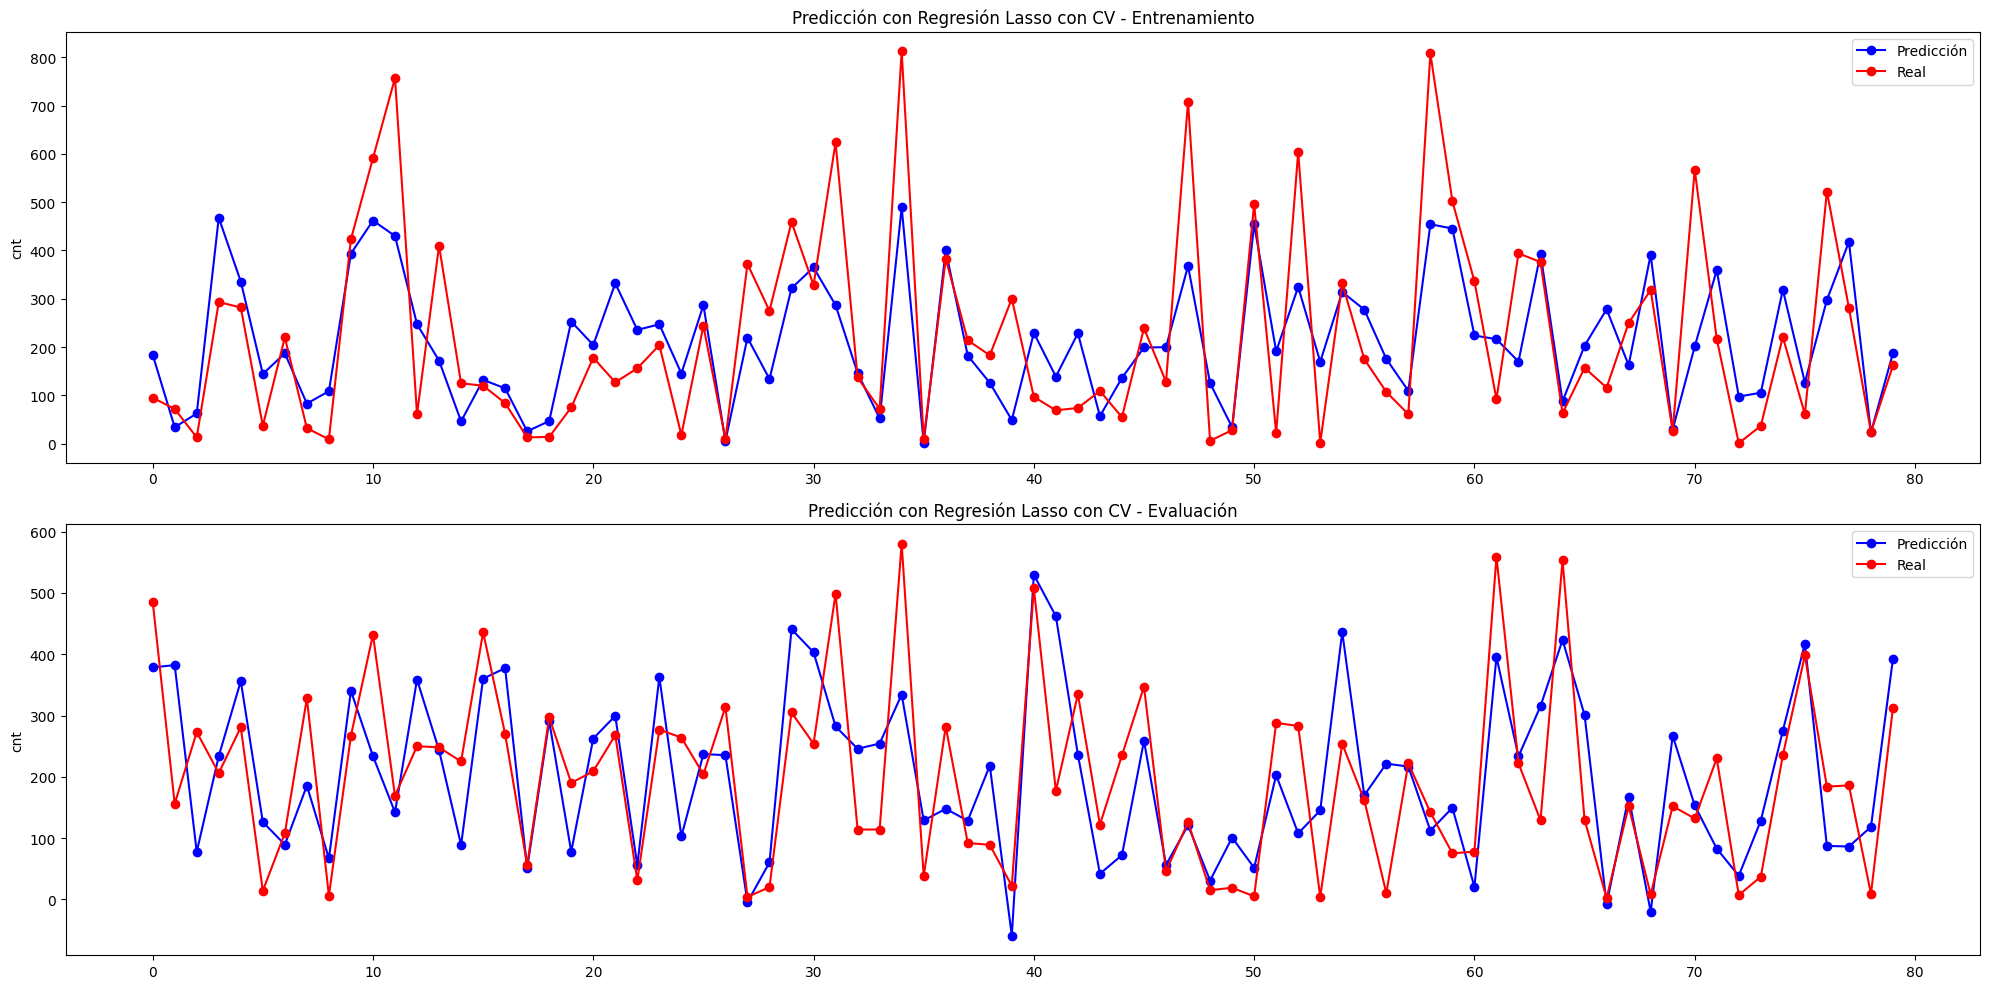

In [35]:
%matplotlib inline
fig, axs = plt.subplots(2,figsize=(20,10))
a = 1000
b= 1080

xvals = list(range(b-a))
axs[0].plot(xvals, y_pred_train[a:b],'bo-', label='Predicción')
axs[0].plot(xvals, Y_train[a:b],'ro-', label='Real')

axs[1].plot(xvals, y_pred_test[a:b],'bo-', label='Predicción')
axs[1].plot(xvals, Y_test[a:b],'ro-', label='Real')

axs[0].set(title='Predicción con Regresión Lasso con CV - Entrenamiento', ylabel=Y_train.name)
axs[0].legend()

axs[1].set(title='Predicción con Regresión Lasso con CV - Evaluación', ylabel=Y_train.name)
axs[1].legend()

plt.tight_layout()
plt.show()

## 3.2. Regresión Regularizada Lasso

El Método Lasso (Least Absolute Shrinkage and Selection Operator), introducido por Tibshirani (1996) es un método que combina un modelo de regresión con un procedimiento de contracción de algunos parámetros hacia cero y selección de variables, imponiendo una restricción
o una penalización sobre los coeficientes de regresión. [3]

### 3.2.1 Construcción de pipeline

Gracias a que se generaron los pipelines de transformación de valores categóricos  para la regresión polinomial pasada no es necesario crearlos de nuevo, solo se hace el llamado de los mismos utilizados durante la regresión lineal

In [79]:
estimators_pr_l1_hip = [
        ('transform', preprocessor),
        ('polinomial',PolynomialFeatures()),
        ('regression', Lasso())
]


pipe_pr_l1 = Pipeline(estimators_pr_l1_hip)

parameters = {
              'polinomial__degree':[2,3,4],
              'regression__alpha' : [0.01, 0.1, 1, 2, 3, 4, 5],
              }

grid_search_lasso = GridSearchCV(pipe_pr_l1, parameters, verbose=2, scoring='neg_mean_squared_error', cv=5)

### 3.2.2 Busqueda de hiperparámetros (alpha)

In [80]:
%%time
grid_search_lasso.fit(X_train, Y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.902e+07, tolerance: 3.675e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END .......polinomial__degree=2, regression__alpha=0.01; total time=  17.0s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.048e+07, tolerance: 3.687e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END .......polinomial__degree=2, regression__alpha=0.01; total time=  17.2s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.647e+07, tolerance: 3.659e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END .......polinomial__degree=2, regression__alpha=0.01; total time=  16.6s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.539e+07, tolerance: 3.683e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END .......polinomial__degree=2, regression__alpha=0.01; total time=  16.5s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.481e+07, tolerance: 3.642e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END .......polinomial__degree=2, regression__alpha=0.01; total time=  16.4s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.832e+06, tolerance: 3.675e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ........polinomial__degree=2, regression__alpha=0.1; total time=  14.4s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.877e+06, tolerance: 3.687e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ........polinomial__degree=2, regression__alpha=0.1; total time=  14.3s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.254e+07, tolerance: 3.659e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ........polinomial__degree=2, regression__alpha=0.1; total time=  14.2s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.203e+07, tolerance: 3.683e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ........polinomial__degree=2, regression__alpha=0.1; total time=  14.5s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.108e+07, tolerance: 3.642e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ........polinomial__degree=2, regression__alpha=0.1; total time=  14.1s
[CV] END ..........polinomial__degree=2, regression__alpha=1; total time=   3.4s
[CV] END ..........polinomial__degree=2, regression__alpha=1; total time=   3.5s
[CV] END ..........polinomial__degree=2, regression__alpha=1; total time=   3.5s
[CV] END ..........polinomial__degree=2, regression__alpha=1; total time=   3.2s
[CV] END ..........polinomial__degree=2, regression__alpha=1; total time=   3.3s
[CV] END ..........polinomial__degree=2, regression__alpha=2; total time=   2.3s
[CV] END ..........polinomial__degree=2, regression__alpha=2; total time=   2.2s
[CV] END ..........polinomial__degree=2, regression__alpha=2; total time=   2.1s
[CV] END ..........polinomial__degree=2, regression__alpha=2; total time=   2.3s
[CV] END ..........polinomial__degree=2, regression__alpha=2; total time=   2.3s
[CV] END ..........polinomial__degree=2, regression__alpha=3; total time=   2.1s
[CV] END ..........polinomia

c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.109e+07, tolerance: 3.675e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END .......polinomial__degree=3, regression__alpha=0.01; total time= 1.2min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.020e+07, tolerance: 3.687e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END .......polinomial__degree=3, regression__alpha=0.01; total time= 1.2min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.061e+07, tolerance: 3.659e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END .......polinomial__degree=3, regression__alpha=0.01; total time= 1.2min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.095e+07, tolerance: 3.683e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END .......polinomial__degree=3, regression__alpha=0.01; total time= 1.2min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.859e+07, tolerance: 3.642e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END .......polinomial__degree=3, regression__alpha=0.01; total time= 1.2min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.365e+07, tolerance: 3.675e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ........polinomial__degree=3, regression__alpha=0.1; total time=  54.7s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.278e+07, tolerance: 3.687e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ........polinomial__degree=3, regression__alpha=0.1; total time=  54.8s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.282e+07, tolerance: 3.659e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ........polinomial__degree=3, regression__alpha=0.1; total time=  53.9s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.336e+07, tolerance: 3.683e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ........polinomial__degree=3, regression__alpha=0.1; total time=  55.1s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.092e+07, tolerance: 3.642e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ........polinomial__degree=3, regression__alpha=0.1; total time=  54.9s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.472e+07, tolerance: 3.675e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=1; total time=  48.3s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.257e+07, tolerance: 3.687e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=1; total time=  47.9s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.359e+07, tolerance: 3.659e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=1; total time=  47.3s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.315e+07, tolerance: 3.683e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=1; total time=  46.5s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.074e+07, tolerance: 3.642e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=1; total time=  46.6s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.494e+07, tolerance: 3.675e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=2; total time=  45.6s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.260e+07, tolerance: 3.687e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=2; total time=  44.0s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.536e+07, tolerance: 3.659e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=2; total time=  44.3s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.353e+07, tolerance: 3.683e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=2; total time=  45.5s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.194e+07, tolerance: 3.642e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=2; total time=  46.2s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.462e+07, tolerance: 3.675e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=3; total time=  41.5s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.336e+07, tolerance: 3.687e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=3; total time=  43.3s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.428e+07, tolerance: 3.659e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=3; total time=  42.8s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.456e+07, tolerance: 3.683e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=3; total time=  43.4s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.887e+07, tolerance: 3.642e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=3; total time=  43.7s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.896e+07, tolerance: 3.675e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=4; total time=  41.5s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.281e+07, tolerance: 3.687e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=4; total time=  41.7s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.066e+07, tolerance: 3.659e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=4; total time=  41.2s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.423e+07, tolerance: 3.683e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=4; total time=  41.4s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.617e+07, tolerance: 3.642e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=4; total time=  41.7s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.610e+07, tolerance: 3.675e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=5; total time=  40.8s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.683e+07, tolerance: 3.687e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=5; total time=  40.4s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.863e+07, tolerance: 3.659e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=5; total time=  40.8s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.206e+07, tolerance: 3.683e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=5; total time=  42.2s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.694e+07, tolerance: 3.642e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=3, regression__alpha=5; total time=  42.1s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.586e+07, tolerance: 3.675e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END .......polinomial__degree=4, regression__alpha=0.01; total time= 4.2min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.520e+07, tolerance: 3.687e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END .......polinomial__degree=4, regression__alpha=0.01; total time= 4.1min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.582e+07, tolerance: 3.659e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END .......polinomial__degree=4, regression__alpha=0.01; total time= 4.1min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.591e+07, tolerance: 3.683e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END .......polinomial__degree=4, regression__alpha=0.01; total time= 4.1min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.399e+07, tolerance: 3.642e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END .......polinomial__degree=4, regression__alpha=0.01; total time= 4.2min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.780e+07, tolerance: 3.675e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ........polinomial__degree=4, regression__alpha=0.1; total time= 3.3min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.705e+07, tolerance: 3.687e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ........polinomial__degree=4, regression__alpha=0.1; total time= 3.3min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.761e+07, tolerance: 3.659e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ........polinomial__degree=4, regression__alpha=0.1; total time= 3.3min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.778e+07, tolerance: 3.683e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ........polinomial__degree=4, regression__alpha=0.1; total time= 3.3min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.578e+07, tolerance: 3.642e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ........polinomial__degree=4, regression__alpha=0.1; total time= 3.2min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.225e+07, tolerance: 3.675e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=1; total time= 2.7min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.131e+07, tolerance: 3.687e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=1; total time= 2.7min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.169e+07, tolerance: 3.659e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=1; total time= 2.6min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.206e+07, tolerance: 3.683e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=1; total time= 2.7min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.979e+07, tolerance: 3.642e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=1; total time= 2.7min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.394e+07, tolerance: 3.675e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=2; total time= 2.5min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.296e+07, tolerance: 3.687e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=2; total time= 2.5min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.322e+07, tolerance: 3.659e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=2; total time= 2.4min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.365e+07, tolerance: 3.683e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=2; total time= 2.4min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.135e+07, tolerance: 3.642e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=2; total time= 2.4min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.488e+07, tolerance: 3.675e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=3; total time= 2.4min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.392e+07, tolerance: 3.687e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=3; total time= 2.4min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.410e+07, tolerance: 3.659e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=3; total time= 2.4min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.459e+07, tolerance: 3.683e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=3; total time= 2.3min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.225e+07, tolerance: 3.642e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=3; total time= 2.3min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.554e+07, tolerance: 3.675e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=4; total time= 2.3min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.459e+07, tolerance: 3.687e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=4; total time= 2.3min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.472e+07, tolerance: 3.659e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=4; total time= 2.3min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.528e+07, tolerance: 3.683e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=4; total time= 2.2min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.289e+07, tolerance: 3.642e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=4; total time= 2.2min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.607e+07, tolerance: 3.675e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=5; total time= 2.2min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.509e+07, tolerance: 3.687e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=5; total time= 2.2min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.520e+07, tolerance: 3.659e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=5; total time= 2.2min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.579e+07, tolerance: 3.683e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=5; total time= 2.2min


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.338e+07, tolerance: 3.642e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........polinomial__degree=4, regression__alpha=5; total time= 2.2min
CPU times: total: 17min 21s
Wall time: 2h 10min 23s


c:\Users\user\OneDrive - Universidad de los andes\FAMILIA 2021\SANTI\2024-1\Analisis con Machine Learning\Machine-Learning-Labs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.134e+08, tolerance: 4.587e+04
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001CA1771B9D0>)])),
                                       ('polinomial', PolynomialFeatures()),
                                       ('regression', Lasso())]),
             param_grid={'polinomial__degree': [2, 3, 4],
                         'regression__alpha': [0.01, 0.1, 1, 2, 3, 4, 5]},
             scoring='neg_mean_squared_error', verbose=2)

In [81]:
best_model_lasso = grid_search_lasso.best_estimator_

pd.DataFrame(grid_search_lasso.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       16.841517      0.315497         0.005185        0.000933   
1       14.389028      0.127542         0.004006        0.000318   
2        3.455150      0.138711         0.004305        0.000982   
3        2.318703      0.092590         0.004307        0.000981   
4        2.188767      0.098107         0.004611        0.001118   
5        1.635000      0.662302         0.003904        0.000861   
6        1.561715      0.555769         0.004960        0.001008   
7       72.214608      0.517409         0.020837        0.001034   
8       54.757343      0.397602         0.021621        0.002325   
9       47.402499      0.711351         0.019005        0.001150   
10      45.204896      0.836006         0.019704        0.001065   
11      43.024371      0.786443         0.018675        0.000923   
12      41.580367      0.168085         0.019281        0.001637   
13      41.335858      0.732041         0.021690        0.002027   
14     249.832692      1.912624         0.096897        0.003878   
15     196.744214      1.877341         0.098226        0.004296   
16     160.284078      1.980579         0.097942        0.001715   
17     146.563726      3.253521         0.095733        0.003315   
18     142.619402      3.652728         0.102413        0.006307   
19     134.757474      1.940203         0.103997        0.006504   
20     131.033886      0.875694         0.099899        0.003309   

   param_polinomial__degree param_regression__alpha  \
0                         2                    0.01   
1                         2                     0.1   
2                         2                       1   
3                         2                       2   
4                         2                       3   
5                         2                       4   
6                         2                       5   
7                         3                    0.01   
8                         3                     0.1   
9                         3                       1   
10                        3                       2   
11                        3                       3   
12                        3                       4   
13                        3                       5   
14                        4                    0.01   
15                        4                     0.1   
16                        4                       1   
17                        4                       2   
18                        4                       3   
19                        4                       4   
20                        4                       5   

                                               params  split0_test_score  \
0   {'polinomial__degree': 2, 'regression__alpha':...      -17126.840517   
1   {'polinomial__degree': 2, 'regression__alpha':...      -17108.701739   
2   {'polinomial__degree': 2, 'regression__alpha': 1}      -17471.452585   
3   {'polinomial__degree': 2, 'regression__alpha': 2}      -17772.991407   
4   {'polinomial__degree': 2, 'regression__alpha': 3}      -17903.568676   
5   {'polinomial__degree': 2, 'regression__alpha': 4}      -18079.427960   
6   {'polinomial__degree': 2, 'regression__alpha': 5}      -18300.825801   
7   {'polinomial__degree': 3, 'regression__alpha':...      -16336.276068   
8   {'polinomial__degree': 3, 'regression__alpha':...      -16375.396609   
9   {'polinomial__degree': 3, 'regression__alpha': 1}      -16652.505997   
10  {'polinomial__degree': 3, 'regression__alpha': 2}      -16749.656003   
11  {'polinomial__degree': 3, 'regression__alpha': 3}      -16832.208505   
12  {'polinomial__degree': 3, 'regression__alpha': 4}      -16903.266117   
13  {'polinomial__degree': 3, 'regression__alpha': 5}      -16972.533628   
14  {'polinomial__degree': 4, 'regression__alpha':...      -16719.403440   
15  {'polinomial__degree': 4, 'regression__alpha':...      -16598.442147   
16  

In [83]:
grid_search_lasso.best_params_

{'polinomial__degree': 3, 'regression__alpha': 0.01}

### 3.2.3 Evaluación del mejor modelo

In [84]:
y_pred_train_lasso = best_model_lasso.predict(X_train)
y_pred_test_lasso = best_model_lasso.predict(X_test)
y_pred_train_lasso

array([ 46.18568979, 292.22642645, 455.71978907, ..., 238.87414751,
         2.95974362, 374.64074244])

In [85]:
n,p = X_train.shape

print('------------ Regresión  Regularizada Lasso con entrenamiento------------')
print("Residual sum of squares (RMSE): %.2f" % np.sqrt(mean_squared_error(Y_train, y_pred_train_lasso)))
print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(Y_train, y_pred_train_lasso))
print("R2-score: %.5f" % r2_score(Y_train, y_pred_train_lasso) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(Y_train, y_pred_train_lasso))*(n-1)/(n-p-1)) )

n,p = X_test.shape

print('------------ Regresión Regularizada Lasso con evaluación ------------')
print("Residual sum of squares (RMSE): %.2f" % np.sqrt(mean_squared_error(Y_test, y_pred_test_lasso)))
print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(Y_test, y_pred_test_lasso))
print("R2-score: %.5f" % r2_score(Y_test, y_pred_test_lasso) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(Y_test, y_pred_test_lasso))*(n-1)/(n-p-1)) )

------------ Regresión  Regularizada Lasso con entrenamiento------------
Residual sum of squares (RMSE): 127.31
Mean Absolute Error (MAE): 93.30
R2-score: 0.50964
Adj R2-score: 0.50904
------------ Regresión Regularizada Lasso con evaluación ------------
Residual sum of squares (RMSE): 126.85
Mean Absolute Error (MAE): 93.06
R2-score: 0.50187
Adj R2-score: 0.49942


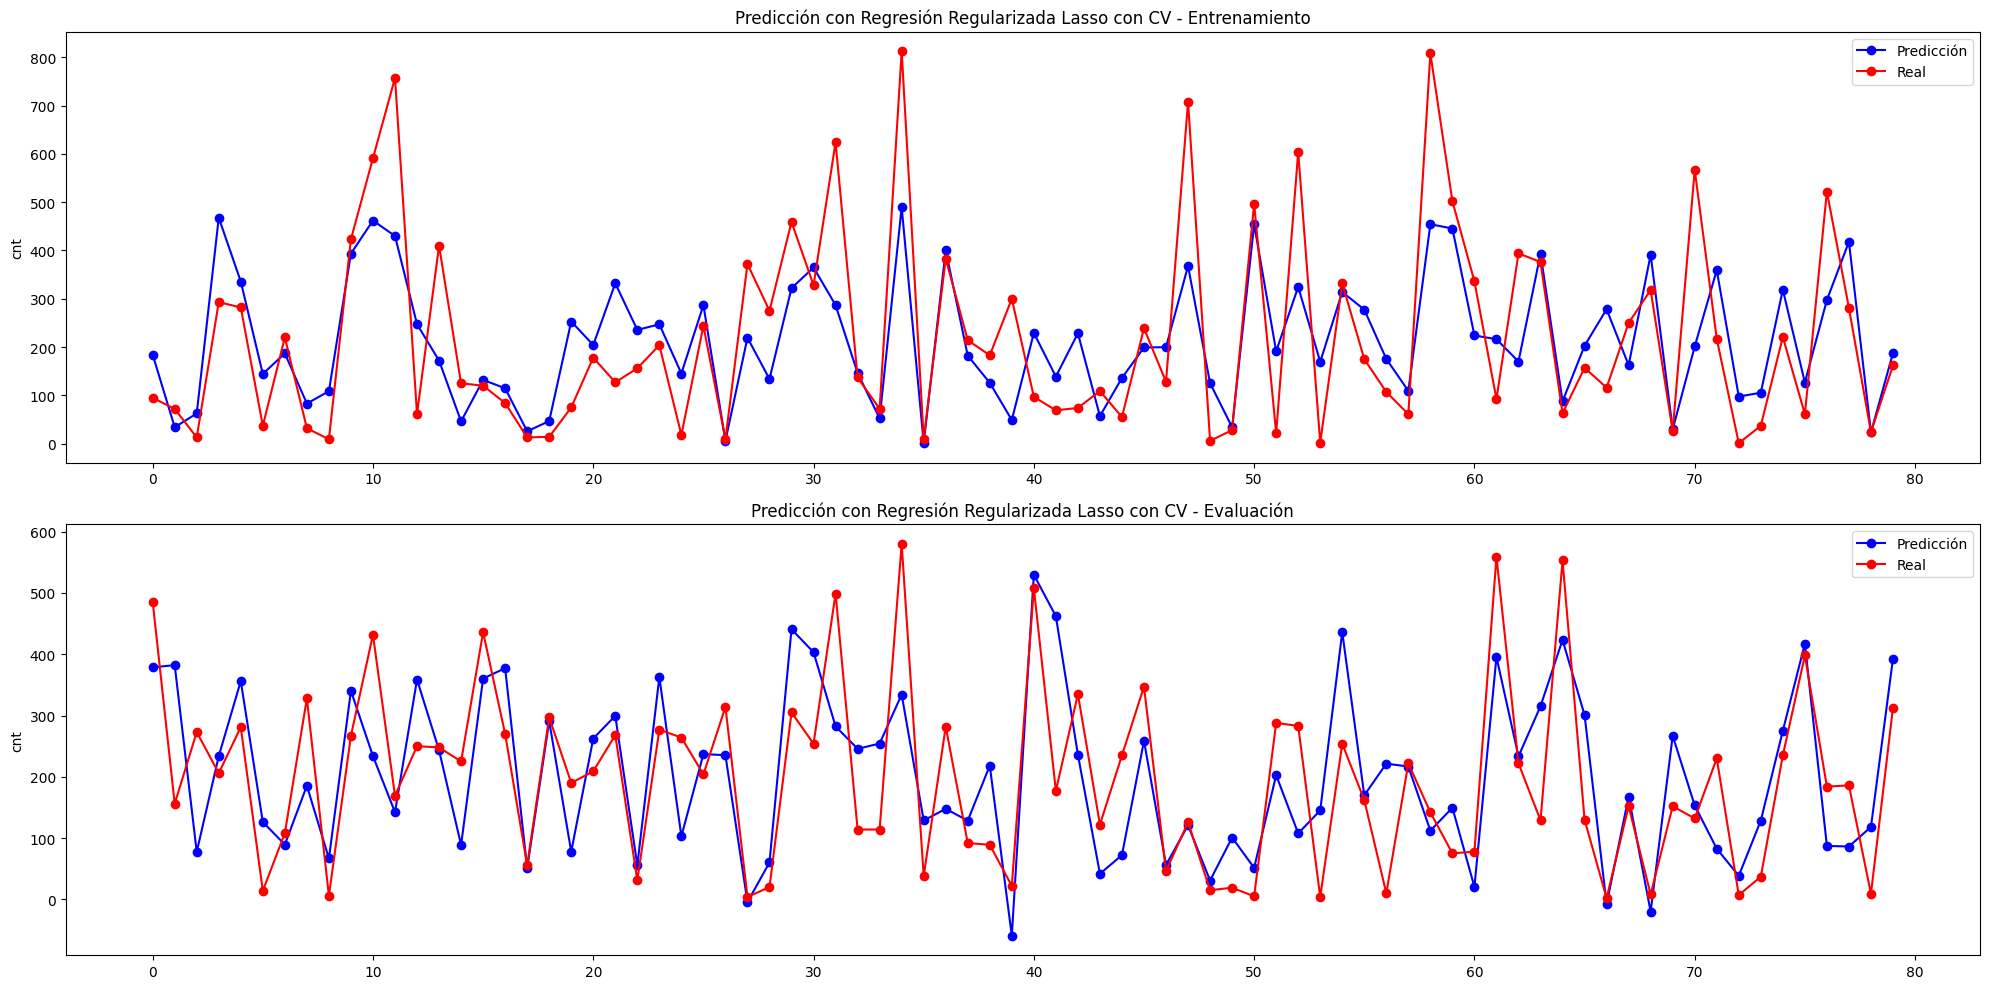

In [86]:
%matplotlib inline
fig, axs = plt.subplots(2,figsize=(20,10))
a = 1000
b= 1080

xvals = list(range(b-a))
axs[0].plot(xvals, y_pred_train[a:b],'bo-', label='Predicción')
axs[0].plot(xvals, Y_train[a:b],'ro-', label='Real')

axs[1].plot(xvals, y_pred_test[a:b],'bo-', label='Predicción')
axs[1].plot(xvals, Y_test[a:b],'ro-', label='Real')

axs[0].set(title='Predicción con Regresión Regularizada Lasso con CV - Entrenamiento', ylabel=Y_train.name)
axs[0].legend()

axs[1].set(title='Predicción con Regresión Regularizada Lasso con CV - Evaluación', ylabel=Y_train.name)
axs[1].legend()

plt.tight_layout()
plt.show()

# 4. Comparación

## 4.1 Tabla de comparación

Modelo      |   R2   |   RMSE  |   MAE  
------------|--------|---------|--------
Polinomial    |  0.49658  |  127.53 |  93.56
Lasso   |  0.50187 |  126.85  |  93.06 


## 4.2 Análisis de la tabla

- El modelo Lasso tiene un R2-score ligeramente superior (0.50187) en comparación con el modelo Polinomial (0.49658).
- El RMSE del modelo Lasso es ligeramente más bajo (126.85) que el del modelo Polinomial (127.53).
- El MAE del modelo Lasso también es ligeramente más bajo (93.06) que el del modelo Polinomial (93.56).

En general, el modelo Lasso ofrece un mejor rendimiento sobre el conjunto de prueba en comparación con el modelo Polinomial en términos de todas las métricas evaluadas (R2-score, RMSE y MAE). Esto sugiere que el modelo Lasso tiene una capacidad predictiva ligeramente superior y tiende a cometer menos errores en las predicciones en comparación con el modelo Polinomial, aunque la diferencia entre ambos sea mínima.

# 5. Coeficientes

## 5.1 Tabla de Coeficientes

In [87]:
lasso_model = best_model_lasso['regression']
trans_df = best_model_lasso['transform'].transform(X_test)
fake_df = best_model_lasso['polinomial'].transform(trans_df)


col_names = X_train.columns

print(f'Intercepto: {lasso_model.intercept_}')
coef = list(zip(['Intercepto'] + list(col_names), [lasso_model.intercept_] + list(lasso_model.coef_)))
coef = pd.DataFrame(coef,columns=['Variable','Parámetro'])
coef

Intercepto: 111.59324233881729


Variable   Parámetro
0            Intercepto  111.593242
1           season_Fall    0.000000
2         season_Spring    0.000000
3         season_Summer   -0.065577
4         season_Winter   33.827746
5        weekday_Friday  -70.357936
6        weekday_Monday    0.142199
7      weekday_Saturday    0.000000
8        weekday_Sunday   -0.000000
9      weekday_Thursday   -0.000000
10      weekday_Tuesday    0.000000
11    weekday_Wednesday  -12.362939
12  time_of_day_Evening    0.000000
13  time_of_day_Morning  124.947261
14    time_of_day_Night   22.034228
15                atemp  -52.142329
16                  hum    5.404626
17            windspeed   -1.396369

Para visualizarlo de una mejor manera se procederá a mostrar los 5 coeficientes mas relevantes para el modelo

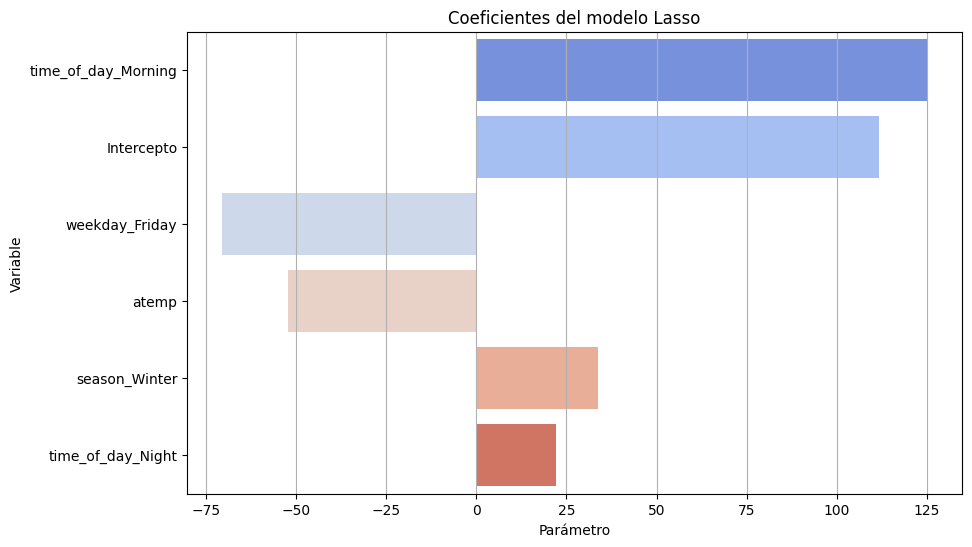

In [93]:
coef_df = coef.copy()
# Filtrar las variables con coeficientes distintos de cero
coef_df = coef_df[coef_df['Parámetro'] != 0]

# Ordenar por valor absoluto de los coeficientes para facilitar la visualización
coef_df['Abs_Parámetro'] = coef_df['Parámetro'].abs()
coef_df = coef_df.sort_values(by='Abs_Parámetro', ascending=False).head(6)

# Graficar los coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x='Parámetro', y='Variable', data=coef_df, palette='coolwarm')
plt.xlabel('Parámetro')
plt.ylabel('Variable')
plt.title('Coeficientes del modelo Lasso')
plt.grid(axis='x')
plt.show()

## 5.2 Interpretación de la tabla

Luego de observar la tabla y la gráfica se pasara a hablar de las 5 variables más importantes, pueden ser divididas en dos categorías: las de coeficiente positivo y las de coeficiente negativo. En este caso los coeficientes de Lasso traen una característica poco común, las variables que parecen afectar de mejor manera la renta de bicicleta como las temperaturas altas son negativas y las características con coeficiente positivo es donde parece que se rentan en promedio menos bicicletas. 

Esto puede deberse a que puede haber multicolinealidad en el modelo.

### 5.2.1 Coeficientes negativos

El hecho de que la sensación de temperatura `atemp` tenga un coeficiente distinto de cero y de un valor elevado sugiere que esta variable es de las más importante para predecir la cantidad de bicicletas rentadas. Esto puede indicar que la temperatura tiene una influencia significativa, en la demanda de bicicletas, lo cual tiene sentido intuitivamente, ya que la gente tiende a alquilar bicicletas más en climas más cálidos y menos en climas más fríos.

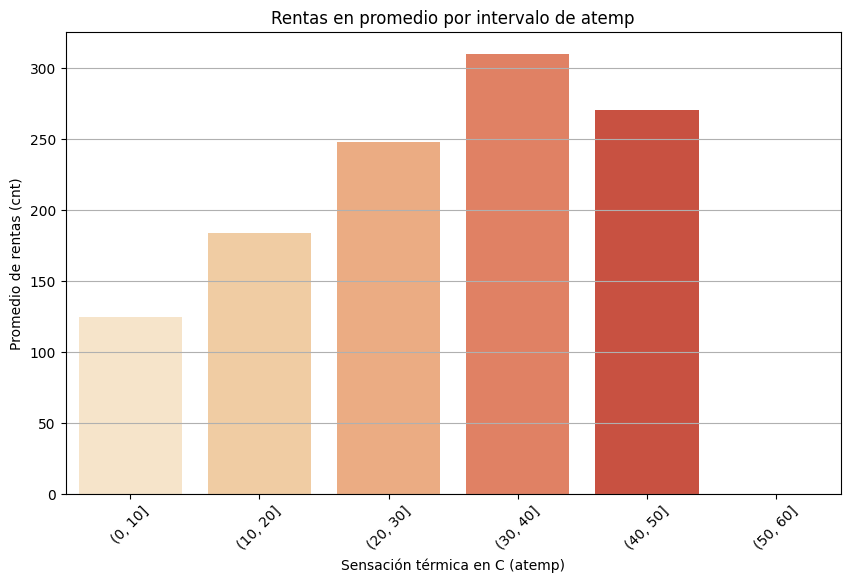

In [89]:


# Define the intervals for "atemp"
intervals = [0, 10, 20, 30, 40, 50, 60]

# Create a new column "atemp_interval" with the interval labels
data['atemp_interval'] = pd.cut(data['atemp'], bins=intervals)

# Calculate the mean of "cnt" for each interval
mean_cnt = data.groupby('atemp_interval')['cnt'].mean().reset_index()

# Plot the graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='atemp_interval', y='cnt', data=mean_cnt, palette='OrRd')
plt.xlabel('Sensación térmica en C (atemp)')
plt.ylabel('Promedio de rentas (cnt)')
plt.title('Rentas en promedio por intervalo de atemp')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


También es posible hablar de el día en que se rentan las bicicletas, pues sobre todo el viernes parece tener una influencia importante en la cantidad de bicicletas rentadas.

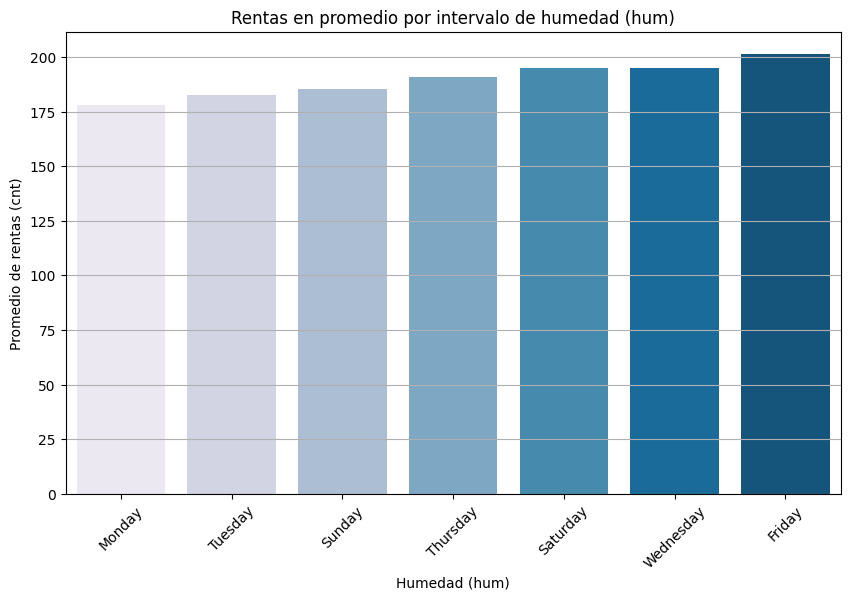

In [122]:
mean_cnt = train.groupby('weekday')['cnt'].mean().sort_values().reset_index()

# Plot the graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=mean_cnt, palette='PuBu')
plt.xlabel('Humedad (hum)')
plt.ylabel('Promedio de rentas (cnt)')
plt.title('Rentas en promedio por intervalo de humedad (hum)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### 5.1.2 Coeficientes positivos

Por otro lado, es posible también observar que el momento del día `time_of_day` es importante, específicamente cuando es por la mañana o noche que es cuando la menor cantidad de bicicletas son rentadas.

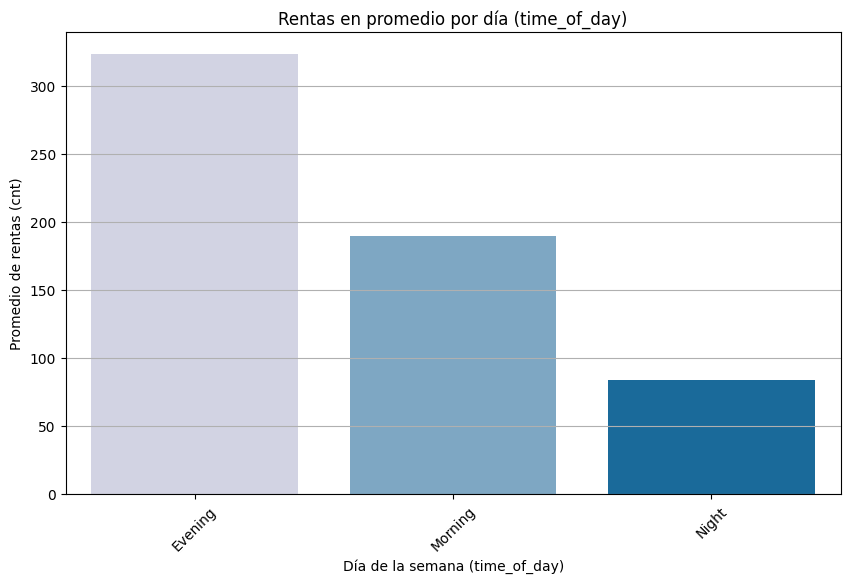

In [118]:


# Calculate the mean of "cnt" for each interval
mean_cnt = train.groupby('time_of_day')['cnt'].mean().reset_index()

# Plot the graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='time_of_day', y='cnt', data=mean_cnt, palette='PuBu')
plt.xlabel('Día de la semana (time_of_day)')
plt.ylabel('Promedio de rentas (cnt)')
plt.title('Rentas en promedio por día (time_of_day)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Este tipo de comportamiento también lo presenta las temporadas, la cual en invierno tiene un coeficiente grande y es cuando menos bicicletas se rentan.

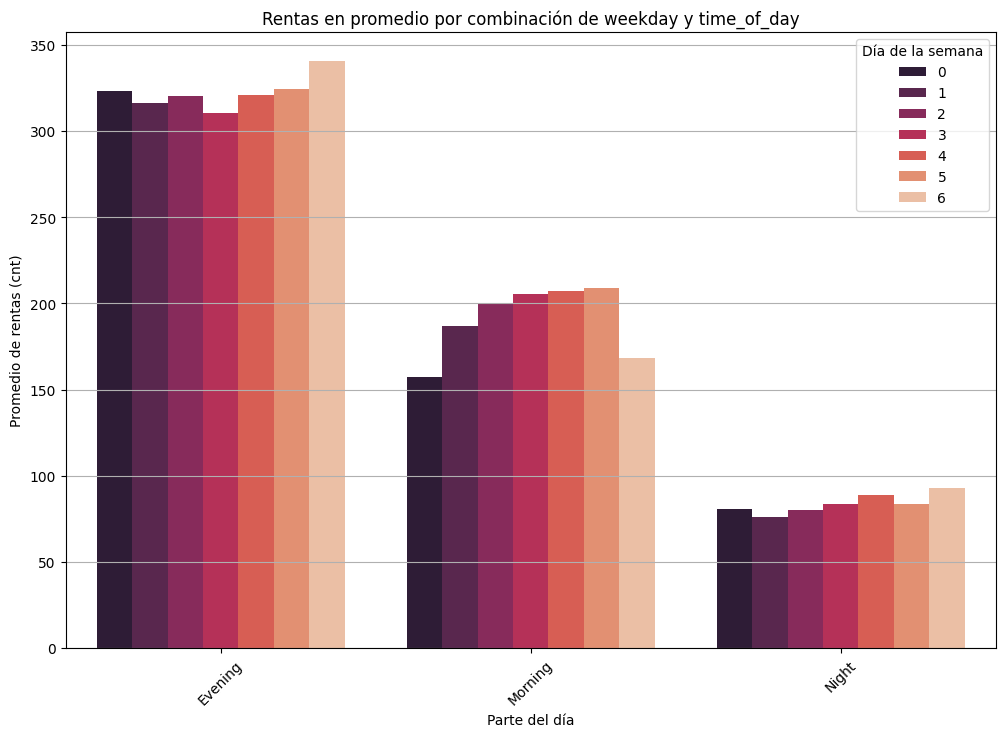

In [126]:
# Calcular el promedio de cnt para cada combinación de weekday y time_of_day
avg_cnt = data.groupby(['weekday', 'time_of_day'])['cnt'].mean().reset_index()

# Plotear la gráfica usando Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='time_of_day', y='cnt', hue='weekday', data=avg_cnt, palette='rocket')
plt.xlabel('Parte del día')
plt.ylabel('Promedio de rentas (cnt)')
plt.title('Rentas en promedio por combinación de weekday y time_of_day')
plt.xticks(rotation=45)
plt.legend(title='Día de la semana')
plt.grid(axis='y')
plt.show()


## 5.3 Recomendaciones

De acuerdo con lo encontrado, gracias a los modelos y a los coeficientes calculados con la __Regresión regularizada Lasso__, se le recomienda al negocio las siguientes acciones:

1. _Planificación de inventario_: Conociendo que la temperatura es el factor más importante para predecir la demanda de alquiler de bicicletas, las empresas de alquiler de bicicletas pueden ajustar sus inventarios en consecuencia. Por ejemplo, podrían aumentar la cantidad de bicicletas disponibles en días calurosos para satisfacer la mayor demanda esperada.

2. _Estrategias de marketing_: Las empresas podrían adaptar sus estrategias de marketing para promover el alquiler de bicicletas en días con temperaturas favorables. Podrían ofrecer descuentos o promociones especiales en días particularmente cálidos para atraer a más clientes potenciales.

3. _Tarifas por jornadas del día y estación_: Como se conoce que el momento en que más se rentan bicicletas es en la tarde pueden establecerse tarifas que exploten mucho más este segmento o que intenten conseguir clientela para las otras franjas del día y estaciones del año donde no se rentan tantas bicicletas (mañana e invierno).


# Referencias

[1] https://vitalflux.com/minmaxscaler-standardscaler-python-examples/

[2] https://aprendeia.com/algoritmo-regresion-polinomial-machine-learning/

[3] https://idus.us.es/bitstream/handle/11441/77576/Ramos%20Castillo%20Laura%20TFG.pdf?sequence=1&isAllowed=y